In [1]:
pip install pandas


Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install numpy

^C
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('customer churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
#replacing blanks with 0 as tenure and no total charges as recorded

df["TotalCharges"]=df["TotalCharges"].replace(" ","0")
df["TotalCharges"]=df["TotalCharges"].astype("float")

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [15]:
df.isnull().sum().sum()

0

In [16]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [18]:
df["customerID"].duplicated().sum()

0

In [19]:
#converted 0 and 1 vales of senior citizen to yes/no to make it easier to understand.

def conv(value):
    if value==1:
        return "yes"
    else:
        return "no"
df['SeniorCitizen']=df["SeniorCitizen"].apply(conv)

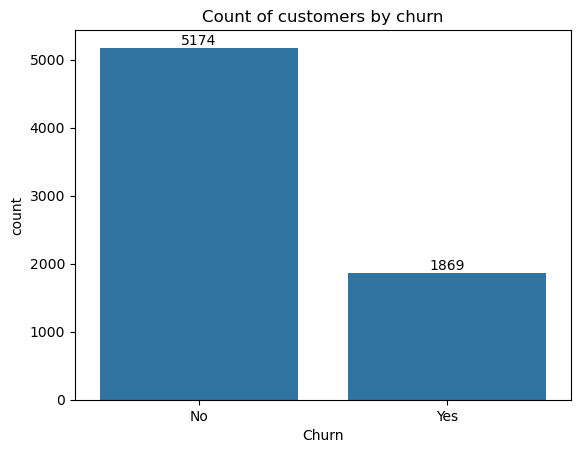

In [33]:
ax=sns.countplot(x='Churn',data=df)
ax.bar_label(ax.containers[0])
plt.title("Count of customers by churn")
plt.show()

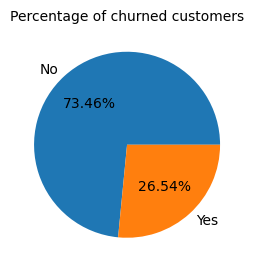

In [36]:
plt.figure(figsize=(3,4))
gb=df.groupby("Churn").agg({'Churn':"count"})
plt.pie(gb['Churn'],labels=gb.index,autopct="%1.2f%%")
plt.title("Percentage of churned customers",fontsize=10)
plt.show()

In [37]:
#from the given chart we can conclude that 26.54% of our customers have churned out
#now let's explore the reason behind it

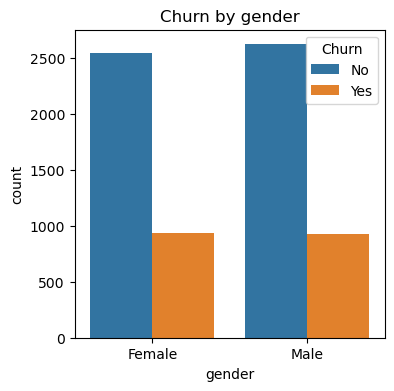

In [49]:
plt.figure(figsize=(4,4))
sns.countplot(x=df["gender"],data=df,hue="Churn")
plt.title("Churn by gender")
plt.show()

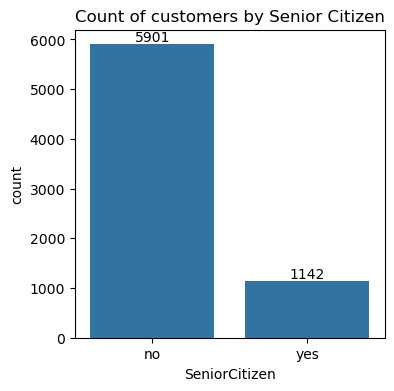

In [50]:
plt.figure(figsize=(4,4))
ax=sns.countplot(x=df["SeniorCitizen"],data=df)
ax.bar_label(ax.containers[0])
plt.title("Count of customers by Senior Citizen")
plt.show()

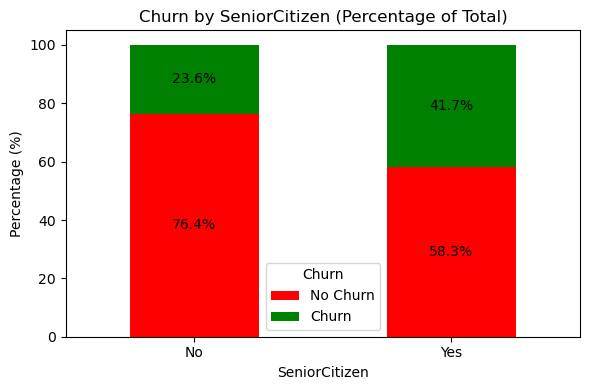

In [54]:
count_data = df.groupby(['SeniorCitizen', 'Churn']).size().unstack()

# Calculate percentage of total for each group
percent_data = count_data.div(count_data.sum(axis=1), axis=0) * 100

# Plot a stacked bar chart
ax = percent_data.plot(kind='bar', stacked=True, figsize=(6, 4), color=['red', 'green'])

# Add percentage labels
for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x = p.get_x() + width / 2
    y = p.get_y() + height / 2
    ax.text(x, y, f'{height:.1f}%', ha='center', va='center')

# Set labels and title
plt.title("Churn by SeniorCitizen (Percentage of Total)")
plt.xlabel("SeniorCitizen")
plt.ylabel("Percentage (%)")
plt.xticks([0, 1], ['No', 'Yes'], rotation=0)  # Assuming 0 and 1 represent No and Yes
plt.legend(title='Churn', labels=['No Churn', 'Churn'])

# Show the plot
plt.tight_layout()
plt.show()

In [52]:
#comparative a greater percentage of people in senior citizen category have churned

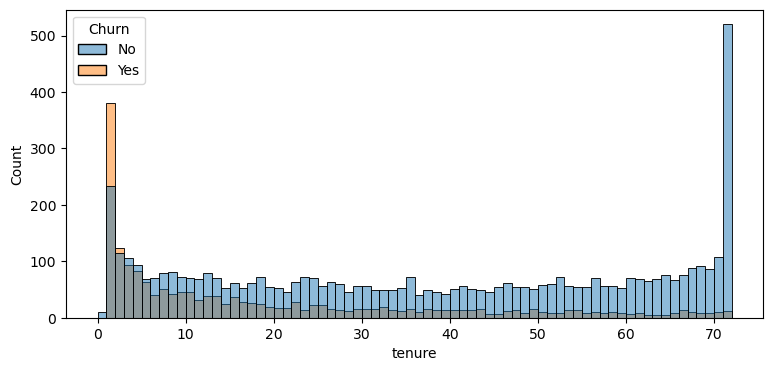

In [61]:
plt.figure(figsize=(9,4))
sns.histplot(x="tenure",data=df,bins=72,hue="Churn")
plt.show()

In [62]:
#people who have used our services for a long time have stayed and people who used our services for one or two months have churned.

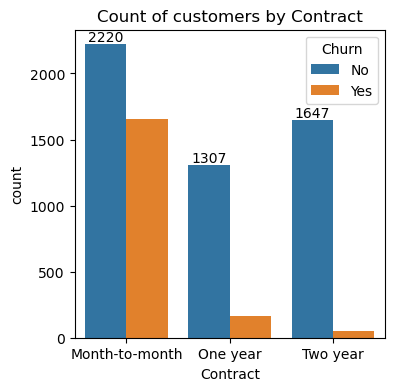

In [64]:
plt.figure(figsize=(4,4))
ax=sns.countplot(x="Contract",data=df,hue="Churn")
ax.bar_label(ax.containers[0])
plt.title("Count of customers by Contract")
plt.show()

In [65]:
#people who have month to month contract are likely to churn than those wh have one or two years of contract.

In [67]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

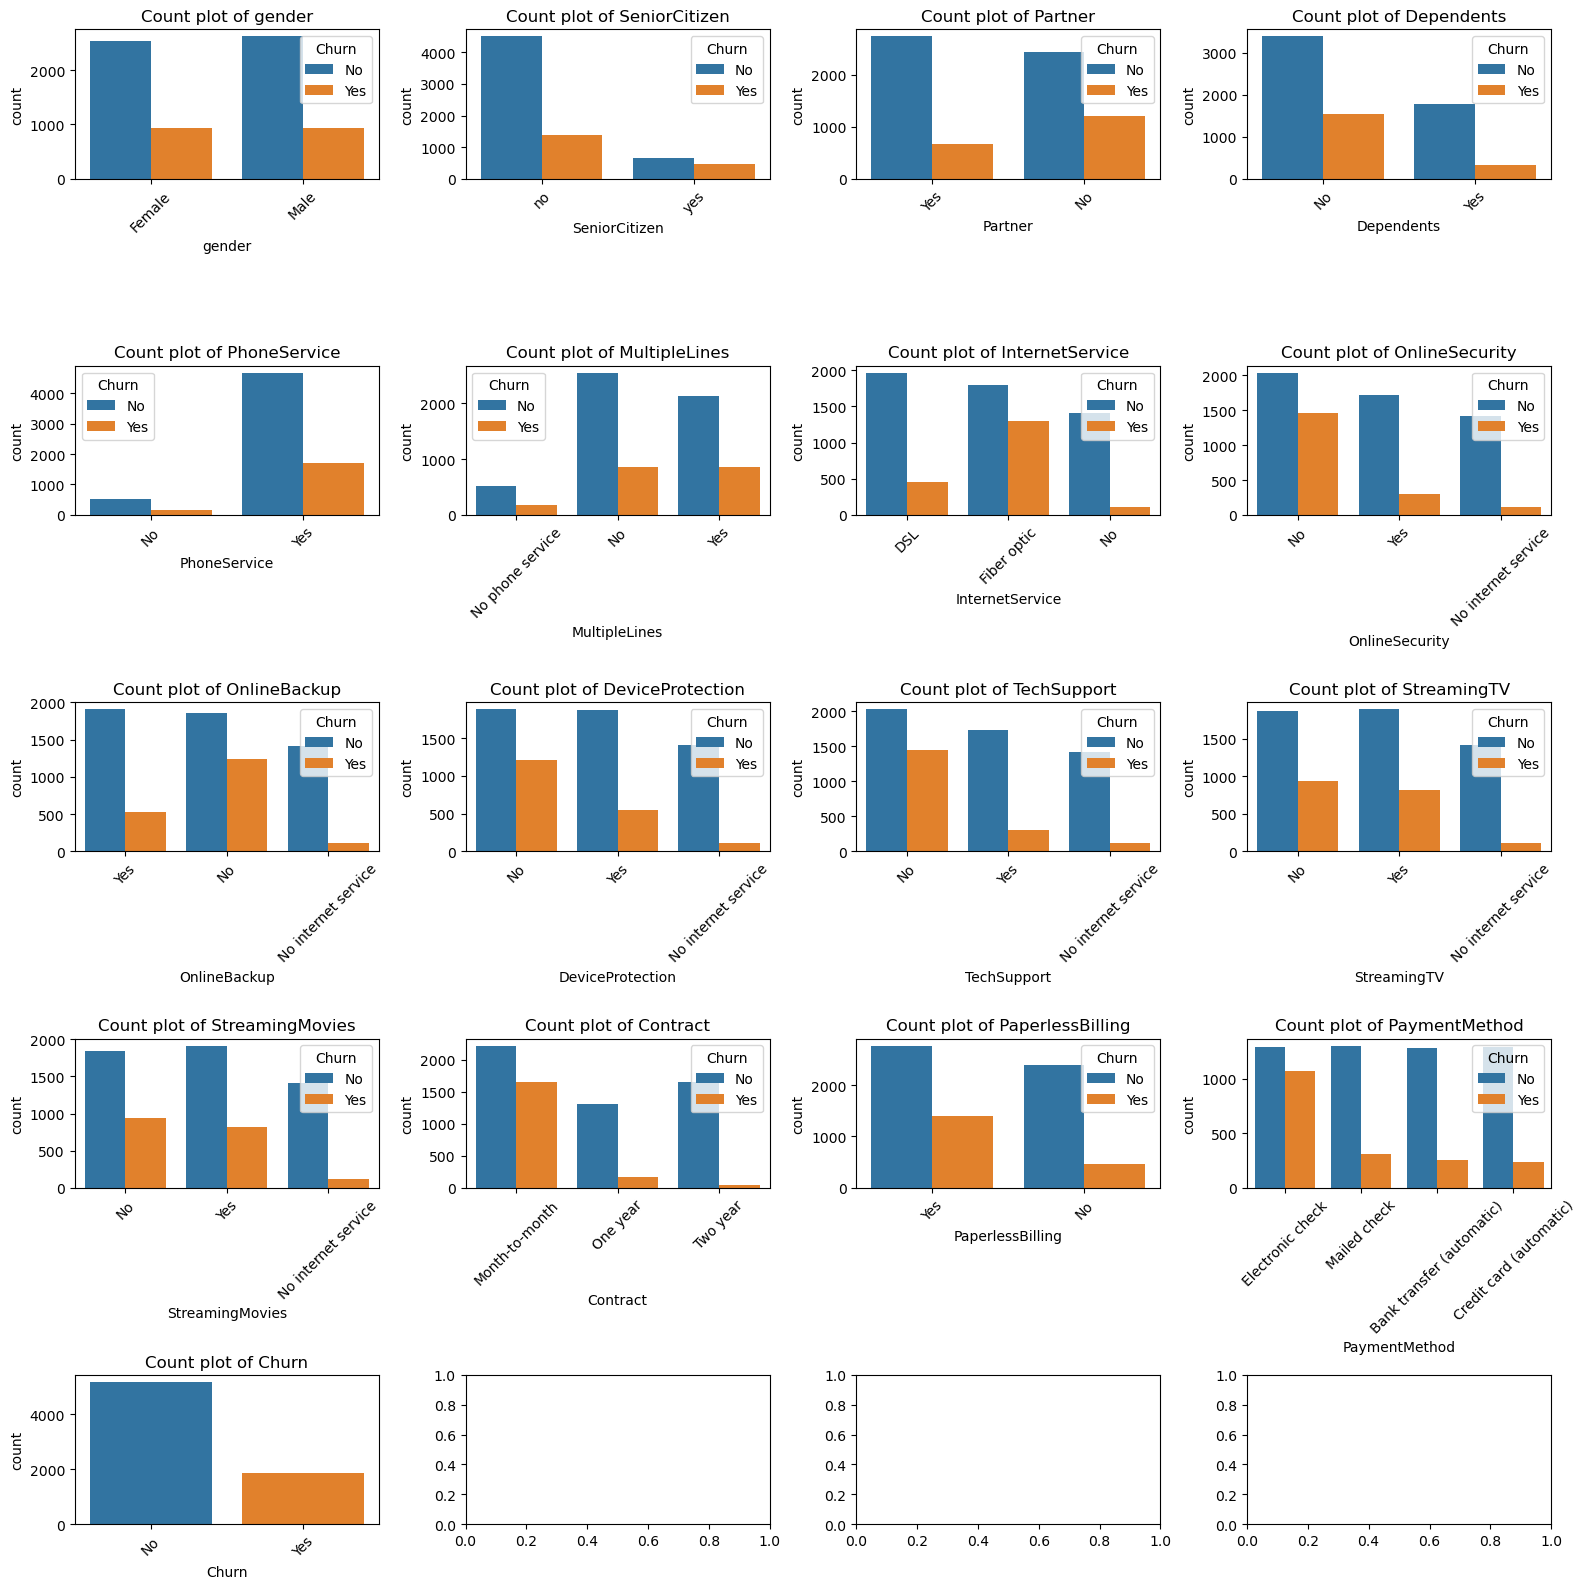

In [71]:


# List of categorical columns to plot
categorical_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 
                       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
                       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
                       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

# Create a figure with subplots (adjust the number of rows and columns based on your needs)
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(16, 16))  # 5 rows, 4 columns

# Flatten the axes to easily iterate over
axes = axes.flatten()

# Loop through each categorical column and create a countplot
for i, col in enumerate(categorical_columns):
    sns.countplot(x=col, data=df, ax=axes[i],hue=df["Churn"])
    axes[i].set_title(f'Count plot of {col}')
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Adjust layout to prevent overlap and ensure proper spacing
plt.tight_layout()
plt.show()


In [72]:
# The visualizayions present count plots showing customer churn (Yes or No) across various service features such as PhoneService,MultipleLines,InternetService and Online Security.The majority of customers who do not churn tend to have services like PhoneService,InternetService (particularly DSL) and OnlineSecurity enabled for services like OnlineBackup,TechSupport and StreamingTV, churn rates are noticeably higher when these services are not used or are unavailable.The charts emphasizes the relationship between service usage and customer churn.

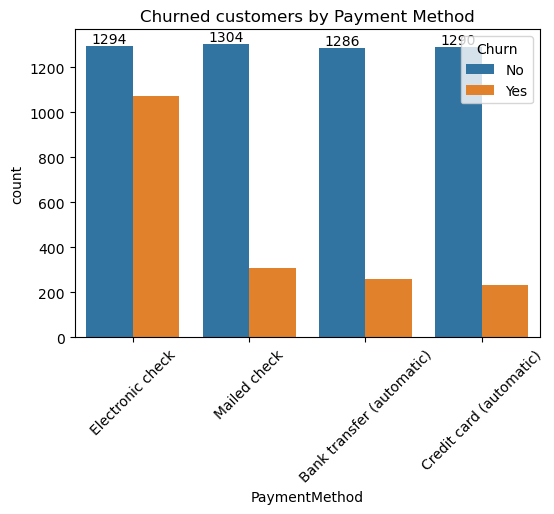

In [75]:
plt.figure(figsize=(6,4))
ax=sns.countplot(x="PaymentMethod",data=df,hue="Churn")
ax.bar_label(ax.containers[0])
plt.title("Churned customers by Payment Method")
plt.xticks(rotation=45)
plt.show()

In [ ]:
#customer is likely to churn when he/she is using electronic check as payment method.